   Temp  Pressure
0     0    0.0002
1    20    0.0012
2    40    0.0060
3    60    0.0300
4    80    0.0900
5   100    0.2700


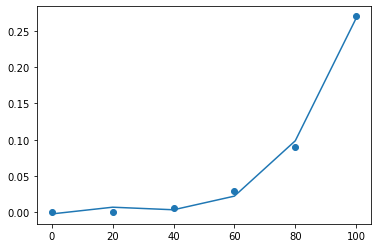

In [9]:
## polynomial regression

import pandas as pd

df = pd.DataFrame({'Temp':[0,20,40,60,80,100], 'Pressure':[0.0002,0.0012,0.0060,0.0300,0.0900,0.2700]})
print(df)

x = df.iloc[:,0:1]
y = df.iloc[:,-1]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

Poly = PolynomialFeatures(degree=3)
model_poly = Poly.fit_transform(x)

lr = LinearRegression()
lr.fit(model_poly,y)

import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.plot(x,lr.predict(model_poly))
plt.show()

In [10]:
lr = LinearRegression()
lr.fit(x,y)
x_t = [[80]]
lr.predict(x_t)

array([0.13649333])

In [11]:
poly = PolynomialFeatures(degree=3)
lin = LinearRegression()
model_poly = poly.fit_transform(x)
lin.fit(model_poly,y)
lin.predict(poly.fit_transform(x_t))

array([0.09865556])

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('car data.csv')
df['Age'] = 2025 - df['Year']
x = df[['Age','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]
y = df['Selling_Price']
x = pd.get_dummies(x, drop_first=True)
print(x)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Poly = PolynomialFeatures(degree=3)

x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

lr = LinearRegression()
lr.fit(x_train_poly,y_train)

y_train_pred = lr.predict(x_train_poly)
y_test_pred = lr.predict(x_test_poly)

from sklearn.metrics import mean_squared_error, r2_score

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
print("MSE=",mse_train)
print("r2=",r2_train)

     Age  Present_Price  Kms_Driven  Owner  Fuel_Type_Diesel  \
0     11           5.59       27000      0                 0   
1     12           9.54       43000      0                 1   
2      8           9.85        6900      0                 0   
3     14           4.15        5200      0                 0   
4     11           6.87       42450      0                 1   
..   ...            ...         ...    ...               ...   
296    9          11.60       33988      0                 1   
297   10           5.90       60000      0                 0   
298   16          11.00       87934      0                 0   
299    8          12.50        9000      0                 1   
300    9           5.90        5464      0                 0   

     Fuel_Type_Petrol  Seller_Type_Individual  Transmission_Manual  
0                   1                       0                    1  
1                   0                       0                    1  
2                   1   

In [36]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("CarPrice_Assignment.csv")
df.corr()

scale_col = [['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]

for c in scale_col:
    df[c] = np.log(df[c])
    
company_names = []

for car_name in df['CarName']:
    company_name = car_name.split(' ')[0]
    company_names.append(company_name)

df['company'] = company_names
df['company'].nunique()

df.company.replace('porcshce','porsche',inplace=True)
df.company.replace('maxda','mazda',inplace=True)
df.company.replace('toyouta','toyota',inplace=True)
df.company.replace('vokswagen','volkswagen',inplace=True)
df.company.replace('vw','volkswagen',inplace=True)
df.company.replace('Nissan','nissan',inplace=True)
df['company'].unique()

df.drop(columns=['car_ID','CarName','symboling'],inplace=True)
categorical_col=['company','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']

df = pd.get_dummies(df,prefix=categorical_col, columns=categorical_col, drop_first=True)

x = df.drop(columns=['price'])
y = df['price']
print(x.shape)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=3)

lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print("mse=",mean_squared_error(y_test,y_pred))
print("r2_score=",r2_score(y_test,y_pred))

(205, 63)
mse= 0.029917090222789423
r2_score= 0.89343310536614
